<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

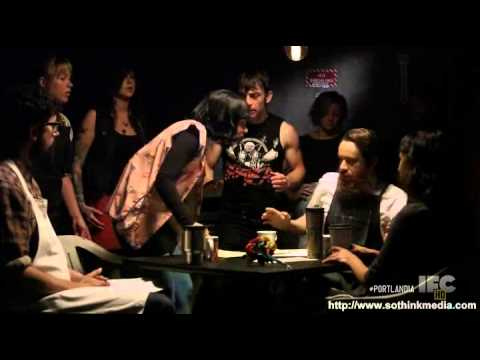

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\JayBeast\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

df = pd.read_csv(url)
df.head(12)

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating
5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4.0 star rating
6,The Factory - Cafe With a Soul,"10/27/2016 2 check-ins Listed in ""Nuptial Cof...",4.0 star rating
7,The Factory - Cafe With a Soul,11/2/2016 2 check-ins Love this place! 5 sta...,5.0 star rating
8,The Factory - Cafe With a Soul,"10/25/2016 1 check-in Ok, let's try this appr...",3.0 star rating
9,The Factory - Cafe With a Soul,11/10/2016 3 check-ins This place has been sh...,5.0 star rating


In [4]:
print(df['coffee_shop_name'].value_counts())
df['star_rating'].value_counts()

Epoch Coffee                            400
Halcyon                                 300
The Factory - Cafe With a Soul          244
Venezia Italian Gelato                  200
Houndstooth Coffee                      200
                                       ... 
Lucky Lab Coffee                         25
Sister Coffee                            17
Kowabunga Coffee                         16
The Marvelous Vintage Tea Party Co.      10
Lola Savannah Coffee Downtown             4
Name: coffee_shop_name, Length: 79, dtype: int64


 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [5]:
df['star_rating'] = df['star_rating'].apply(lambda x: x.lower())
df['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [6]:
df['coffee_shop_name'] = df['coffee_shop_name'].apply(lambda x: x.lower())
df['coffee_shop_name'].value_counts()

epoch coffee                            400
halcyon                                 300
the factory - cafe with a soul          244
venezia italian gelato                  200
houndstooth coffee                      200
                                       ... 
lucky lab coffee                         25
sister coffee                            17
kowabunga coffee                         16
the marvelous vintage tea party co.      10
lola savannah coffee downtown             4
Name: coffee_shop_name, Length: 79, dtype: int64

In [7]:
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [8]:
df.shape

(7616, 3)

In [9]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [10]:
df['tokens'] = df['full_review_text'].apply(tokenize)
df['tokens'].head()


0    [11252016, 1, checkin, love, love, loved, the,...
1    [1222016, listed, in, date, night, austin, amb...
2    [11302016, 1, checkin, listed, in, brunch, spo...
3    [11252016, very, cool, decor, good, drinks, ni...
4    [1232016, 1, checkin, they, are, located, with...
Name: tokens, dtype: object

In [11]:
df[['full_review_text', 'tokens']][:5]

,full_review_text,tokens
0,11/25/2016 1 check-in Love love loved the atm...,"[11252016, 1, checkin, love, love, loved, the,..."
1,"12/2/2016 Listed in Date Night: Austin, Ambia...","[1222016, listed, in, date, night, austin, amb..."
2,11/30/2016 1 check-in Listed in Brunch Spots ...,"[11302016, 1, checkin, listed, in, brunch, spo..."
3,11/25/2016 Very cool decor! Good drinks Nice ...,"[11252016, very, cool, decor, good, drinks, ni..."
4,12/3/2016 1 check-in They are located within ...,"[1232016, 1, checkin, they, are, located, with..."


In [12]:
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
df['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 34809),
 ('and', 26650),
 ('a', 22755),
 ('i', 20237),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10353),
 ('was', 9707),
 ('in', 9546)]

In [13]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [14]:
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
61,the,6847,34809,1.0,0.044537,0.044537,0.899028
59,and,6864,26650,2.0,0.034098,0.078635,0.901261
39,a,6246,22755,3.0,0.029114,0.107749,0.820116
5,i,5528,20237,4.0,0.025893,0.133642,0.725840
21,to,5653,17164,5.0,0.021961,0.155602,0.742253


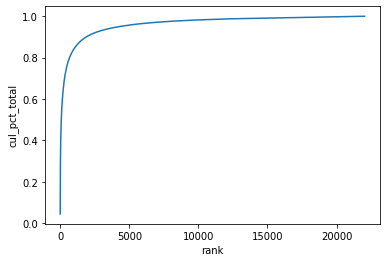

In [15]:
import seaborn as sns


# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

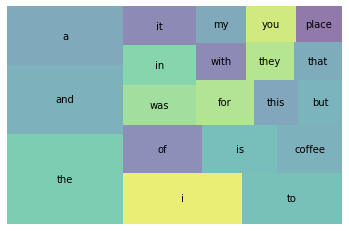

In [16]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.6)
plt.axis('off')
plt.show()

In [17]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [18]:
list(df)

['coffee_shop_name', 'full_review_text', 'star_rating', 'tokens']

In [19]:

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(df['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

df['tokens'] = tokens

In [20]:
df['tokens'].head()

0    [ , 11/25/2016, 1, check-in, Love, love, loved...
1    [ , 12/2/2016, Listed, in, Date, Night:, Austi...
2    [ , 11/30/2016, 1, check-in, Listed, in, Brunc...
3    [ , 11/25/2016, Very, cool, decor!, Good, drin...
4    [ , 12/3/2016, 1, check-in, They, are, located...
Name: tokens, dtype: object

In [21]:
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
35,the,6520,27779,1.0,0.034334,0.034334,0.856092
34,and,6804,25748,2.0,0.031824,0.066157,0.893382
8,,7616,22606,3.0,0.027940,0.094097,1.000000
12,a,6181,22085,4.0,0.027296,0.121394,0.811581
32,I,5469,19780,5.0,0.024447,0.145841,0.718093


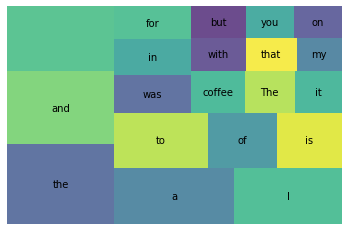

In [22]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [23]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(df['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['tokens'] = tokens

In [24]:
df['tokens'].head()

0    [ , 11/25/2016, 1, check-in, love, love, loved...
1    [ , 12/2/2016, listed, date, night:, austin,, ...
2    [ , 11/30/2016, 1, check-in, listed, brunch, s...
3    [ , 11/25/2016, cool, decor!, good, drinks, ni...
4    [ , 12/3/2016, 1, check-in, located, northcros...
Name: tokens, dtype: object

In [25]:
wc_new = count(df['tokens'])
wc_new.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
18,,7616,22606,1.0,0.053592,0.053592,1.000000
32,coffee,4210,8058,2.0,0.019103,0.072695,0.552784
108,place,3029,4264,3.0,0.010109,0.082803,0.397715
160,great,2438,3250,4.0,0.007705,0.090508,0.320116
247,it's,2061,3117,5.0,0.007389,0.097897,0.270614


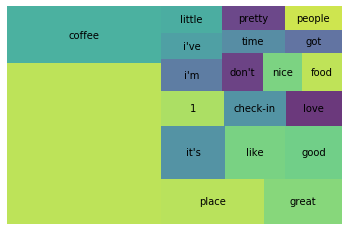

In [26]:
wc_new_top20 = wc_new[wc_new['rank'] <= 20]

squarify.plot(sizes=wc_new_top20['pct_total'], label=wc_new_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [27]:
STOP_WORDS = nlp.Defaults.stop_words.union([' ', '1', 'like', "it's", "i'm", "i've", "don't", '-' ])

In [28]:
#STOP_WORDS

In [67]:
tokens = []

for doc in tokenizer.pipe(df['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS and (token.is_punct == False) and (token.pos_ != 'PRON'):
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

In [30]:
wc_newest = count(df['tokens'])
wc_newest.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
30,coffee,4210,8058,1.0,0.020849,0.020849,0.552784
106,place,3029,4264,2.0,0.011033,0.031882,0.397715
158,great,2438,3250,3.0,0.008409,0.040291,0.320116
190,good,2084,2779,4.0,0.007190,0.047481,0.273634
39,check-in,1957,1961,5.0,0.005074,0.052555,0.256959


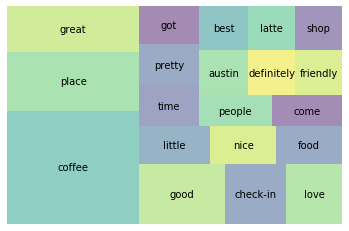

In [31]:
wc_newest_top20 = wc_newest[wc_newest['rank'] <= 20]

squarify.plot(sizes=wc_newest_top20['pct_total'], label=wc_newest_top20['word'], alpha=.5 )
plt.axis('off')
plt.show()

In [32]:
df['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [33]:
df.head()

,coffee_shop_name,full_review_text,star_rating,tokens
0,the factory - cafe with a soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[11/25/2016, check-in, love, love, loved, atmo..."
1,the factory - cafe with a soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[12/2/2016, listed, date, night:, austin,, amb..."
2,the factory - cafe with a soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[11/30/2016, check-in, listed, brunch, spots, ..."
3,the factory - cafe with a soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[11/25/2016, cool, decor!, good, drinks, nice,..."
4,the factory - cafe with a soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[12/3/2016, check-in, located, northcross, mal..."


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

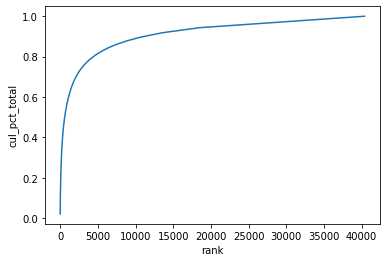

In [34]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc_newest);


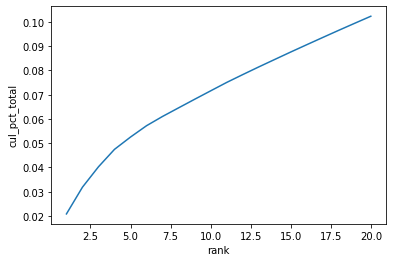

In [35]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc_newest.head(20));

In [36]:
 # HAD TROUBLE WITH LEMMAS FORMATTING, STILL INCLUDing pronouns, punctuation, etc

In [37]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    
    return lemmas

In [38]:
tokens1 = []

for doc in tokenizer.pipe(df['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS and (token.is_punct == False) and (token.pos_ != 'PRON') :
            doc_tokens.append(token.text.lower())
   
    tokens1.append(doc_tokens)
    
df['lemmas'] = tokens1

In [39]:
df['lemmas'].head(15)

0     [11/25/2016, check-in, love, love, loved, atmo...
1     [12/2/2016, listed, date, night:, austin,, amb...
2     [11/30/2016, check-in, listed, brunch, spots, ...
3     [11/25/2016, cool, decor!, good, drinks, nice,...
4     [12/3/2016, check-in, located, northcross, mal...
5     [11/20/2016, check-in, cute, cafe!, think, mom...
6     [10/27/2016, 2, check-ins, listed, "nuptial, c...
7     [11/2/2016, 2, check-ins, love, place!, 5, sta...
8     [10/25/2016, check-in, ok,, let's, try, approa...
9     [11/10/2016, 3, check-ins, place, shown, socia...
10    [10/22/2016, check-in, listed, americano, aver...
11    [11/20/2016, store, a+, decoration,, honestly,...
12    [11/17/2016, check-in, listed, 2016, time, cha...
13    [12/5/2016, cute, little, cafe!, driven, place...
14    [11/13/2016, beautiful, eccentric, coffee, sho...
Name: lemmas, dtype: object

In [40]:
df.head()

,coffee_shop_name,full_review_text,star_rating,tokens,lemmas
0,the factory - cafe with a soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[11/25/2016, check-in, love, love, loved, atmo...","[11/25/2016, check-in, love, love, loved, atmo..."
1,the factory - cafe with a soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[12/2/2016, listed, date, night:, austin,, amb...","[12/2/2016, listed, date, night:, austin,, amb..."
2,the factory - cafe with a soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[11/30/2016, check-in, listed, brunch, spots, ...","[11/30/2016, check-in, listed, brunch, spots, ..."
3,the factory - cafe with a soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[11/25/2016, cool, decor!, good, drinks, nice,...","[11/25/2016, cool, decor!, good, drinks, nice,..."
4,the factory - cafe with a soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[12/3/2016, check-in, located, northcross, mal...","[12/3/2016, check-in, located, northcross, mal..."


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


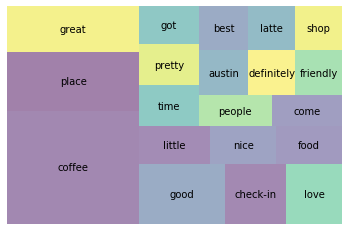

In [41]:
# top 20 words used in reviews

wc_newest_top20 = wc_newest[wc_newest['rank'] <= 20]

squarify.plot(sizes=wc_newest_top20['pct_total'], label=wc_newest_top20['word'], alpha=.5 )
plt.axis('off')
plt.show()

In [42]:
# Want to find out how often these 20 words appear in 1-3 and 4-5 star ratings
# can divide database into 1-3, and 4-5 star ratings, and first compare the sns.lineplot(x='rank', y='cul_pct_total', data=wc_newest.head(20)); and then find top 20 words for 1-3 and 4-5 star ratings



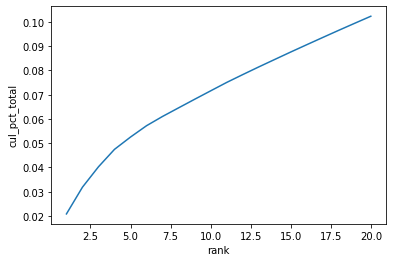

In [43]:
# so this is how the top 20 most frequent words relate overall
sns.lineplot(x='rank', y='cul_pct_total', data=wc_newest.head(20));
# they represent in total about 10 percent of overall words, 
# now we want to find what portion of the 4-5 star and 1-3 star they represent
# so need to divide df into 1-3 star ratings, and 4-5 star ratings to figure this out

In [44]:
df.head()
#so something like dfnew= df where star_rating = 4.0 star rating and star_rating = 5.0 star rating...etc.


,coffee_shop_name,full_review_text,star_rating,tokens,lemmas
0,the factory - cafe with a soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[11/25/2016, check-in, love, love, loved, atmo...","[11/25/2016, check-in, love, love, loved, atmo..."
1,the factory - cafe with a soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[12/2/2016, listed, date, night:, austin,, amb...","[12/2/2016, listed, date, night:, austin,, amb..."
2,the factory - cafe with a soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[11/30/2016, check-in, listed, brunch, spots, ...","[11/30/2016, check-in, listed, brunch, spots, ..."
3,the factory - cafe with a soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[11/25/2016, cool, decor!, good, drinks, nice,...","[11/25/2016, cool, decor!, good, drinks, nice,..."
4,the factory - cafe with a soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[12/3/2016, check-in, located, northcross, mal...","[12/3/2016, check-in, located, northcross, mal..."


In [45]:
df['star_rating'].head(12)


0      5.0 star rating 
1      4.0 star rating 
2      4.0 star rating 
3      2.0 star rating 
4      4.0 star rating 
5      4.0 star rating 
6      4.0 star rating 
7      5.0 star rating 
8      3.0 star rating 
9      5.0 star rating 
10     4.0 star rating 
11     3.0 star rating 
Name: star_rating, dtype: object

In [46]:
df["star_rating"] = df["star_rating"].astype('str')
print(df.dtypes)
df.head()

coffee_shop_name    object
full_review_text    object
star_rating         object
tokens              object
lemmas              object
dtype: object


,coffee_shop_name,full_review_text,star_rating,tokens,lemmas
0,the factory - cafe with a soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[11/25/2016, check-in, love, love, loved, atmo...","[11/25/2016, check-in, love, love, loved, atmo..."
1,the factory - cafe with a soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[12/2/2016, listed, date, night:, austin,, amb...","[12/2/2016, listed, date, night:, austin,, amb..."
2,the factory - cafe with a soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[11/30/2016, check-in, listed, brunch, spots, ...","[11/30/2016, check-in, listed, brunch, spots, ..."
3,the factory - cafe with a soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[11/25/2016, cool, decor!, good, drinks, nice,...","[11/25/2016, cool, decor!, good, drinks, nice,..."
4,the factory - cafe with a soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[12/3/2016, check-in, located, northcross, mal...","[12/3/2016, check-in, located, northcross, mal..."


In [47]:
df['rating'] = df['star_rating'].apply(lambda x: x.replace(' star rating', '')).astype('float')
del df['star_rating']



In [48]:
df_good = df.loc[df.rating >= 4]
df_bad = df.loc[df.rating <=3]
print(df_bad.shape)
df_good.shape

(1476, 5)


(6140, 5)

In [49]:
df_bad.head()

,coffee_shop_name,full_review_text,tokens,lemmas,rating
3,the factory - cafe with a soul,11/25/2016 Very cool decor! Good drinks Nice ...,"[11/25/2016, cool, decor!, good, drinks, nice,...","[11/25/2016, cool, decor!, good, drinks, nice,...",2.0
8,the factory - cafe with a soul,"10/25/2016 1 check-in Ok, let's try this appr...","[10/25/2016, check-in, ok,, let's, try, approa...","[10/25/2016, check-in, ok,, let's, try, approa...",3.0
11,the factory - cafe with a soul,"11/20/2016 The store has A+ decoration, but h...","[11/20/2016, store, a+, decoration,, honestly,...","[11/20/2016, store, a+, decoration,, honestly,...",3.0
12,the factory - cafe with a soul,11/17/2016 1 check-in Listed in 2016 - The Th...,"[11/17/2016, check-in, listed, 2016, time, cha...","[11/17/2016, check-in, listed, 2016, time, cha...",3.0
25,the factory - cafe with a soul,"12/2/2016 Okay, so after visiting my friends ...","[12/2/2016, okay,, visiting, friends, la, tryi...","[12/2/2016, okay,, visiting, friends, la, tryi...",1.0


In [50]:
df_good.head()

,coffee_shop_name,full_review_text,tokens,lemmas,rating
0,the factory - cafe with a soul,11/25/2016 1 check-in Love love loved the atm...,"[11/25/2016, check-in, love, love, loved, atmo...","[11/25/2016, check-in, love, love, loved, atmo...",5.0
1,the factory - cafe with a soul,"12/2/2016 Listed in Date Night: Austin, Ambia...","[12/2/2016, listed, date, night:, austin,, amb...","[12/2/2016, listed, date, night:, austin,, amb...",4.0
2,the factory - cafe with a soul,11/30/2016 1 check-in Listed in Brunch Spots ...,"[11/30/2016, check-in, listed, brunch, spots, ...","[11/30/2016, check-in, listed, brunch, spots, ...",4.0
4,the factory - cafe with a soul,12/3/2016 1 check-in They are located within ...,"[12/3/2016, check-in, located, northcross, mal...","[12/3/2016, check-in, located, northcross, mal...",4.0
5,the factory - cafe with a soul,11/20/2016 1 check-in Very cute cafe! I think...,"[11/20/2016, check-in, cute, cafe!, think, mom...","[11/20/2016, check-in, cute, cafe!, think, mom...",4.0


In [51]:
df_bad['tokens'] = df_bad['full_review_text'].apply(tokenize)
df_bad['tokens'].head()


C:\Users\JayBeast\anaconda4\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


3     [11252016, very, cool, decor, good, drinks, ni...
8     [10252016, 1, checkin, ok, lets, try, this, ap...
11    [11202016, the, store, has, a, decoration, but...
12    [11172016, 1, checkin, listed, in, 2016, the, ...
25    [1222016, okay, so, after, visiting, my, frien...
Name: tokens, dtype: object

In [52]:
df_good['tokens'] = df_good['full_review_text'].apply(tokenize)
df_good['tokens'].head()

C:\Users\JayBeast\anaconda4\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    [11252016, 1, checkin, love, love, loved, the,...
1    [1222016, listed, in, date, night, austin, amb...
2    [11302016, 1, checkin, listed, in, brunch, spo...
4    [1232016, 1, checkin, they, are, located, with...
5    [11202016, 1, checkin, very, cute, cafe, i, th...
Name: tokens, dtype: object

In [68]:
wc1 = count(df_bad['tokens'])
wc1.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
29,coffee,827,1637,1.0,0.019205,0.019205,0.560298
103,place,597,875,2.0,0.010265,0.029470,0.404472
35,good,441,599,3.0,0.007027,0.036498,0.298780
156,food,266,369,4.0,0.004329,0.040827,0.180217
145,check-in,359,359,5.0,0.004212,0.045039,0.243225


In [69]:
wc2 = count(df_good['tokens'])
wc2.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
30,coffee,3383,6421,1.0,0.021315,0.021315,0.550977
106,place,2432,3389,2.0,0.011250,0.032564,0.396091
158,great,2174,2902,3.0,0.009633,0.042198,0.354072
309,good,1643,2180,4.0,0.007237,0.049434,0.267590
26,love,1263,1604,5.0,0.005324,0.054759,0.205700


In [77]:
tokens = []

for doc in tokenizer.pipe(df_bad['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS and (token.is_punct == False) and (token.pos_ != 'PRON'):
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df_bad['tokens'] = tokens


C:\Users\JayBeast\anaconda4\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [70]:
wcbad = count(df_bad['tokens'])
wcbad.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
29,coffee,827,1637,1.0,0.019205,0.019205,0.560298
103,place,597,875,2.0,0.010265,0.029470,0.404472
35,good,441,599,3.0,0.007027,0.036498,0.298780
156,food,266,369,4.0,0.004329,0.040827,0.180217
145,check-in,359,359,5.0,0.004212,0.045039,0.243225
241,time,264,351,6.0,0.004118,0.049156,0.178862
161,pretty,278,349,7.0,0.004094,0.053251,0.188347
181,great,264,348,8.0,0.004083,0.057334,0.178862
507,people,247,327,9.0,0.003836,0.061170,0.167344
6,service,261,314,10.0,0.003684,0.064854,0.176829


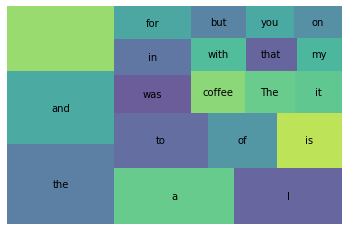

In [71]:
wc_bad_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_bad_top20['pct_total'], label=wc_bad_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [58]:
tokens = []

for doc in tokenizer.pipe(df_good['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS and (token.is_punct == False) and (token.pos_ != 'PRON'):
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df_good['tokens'] = tokens

C:\Users\JayBeast\anaconda4\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [72]:
wcgood = count(df_good['tokens'])
wcgood.head(20)




,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
30,coffee,3383,6421,1.0,0.021315,0.021315,0.550977
106,place,2432,3389,2.0,0.011250,0.032564,0.396091
158,great,2174,2902,3.0,0.009633,0.042198,0.354072
309,good,1643,2180,4.0,0.007237,0.049434,0.267590
26,love,1263,1604,5.0,0.005324,0.054759,0.205700
39,check-in,1598,1602,6.0,0.005318,0.060076,0.260261
610,little,1027,1230,7.0,0.004083,0.064159,0.167264
206,nice,962,1101,8.0,0.003655,0.067814,0.156678
413,best,951,1093,9.0,0.003628,0.071442,0.154886
178,friendly,986,1014,10.0,0.003366,0.074808,0.160586


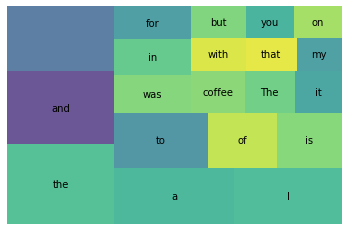

In [73]:
wc_good_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_good_top20['pct_total'], label=wc_good_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [61]:
# find difference in wcgood and wcbad counts 

In [62]:
wc_good_top20.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
35,the,6520,27779,1.0,0.034334,0.034334,0.856092
34,and,6804,25748,2.0,0.031824,0.066157,0.893382
8,,7616,22606,3.0,0.027940,0.094097,1.000000
12,a,6181,22085,4.0,0.027296,0.121394,0.811581
32,I,5469,19780,5.0,0.024447,0.145841,0.718093


In [66]:
wcbad2 = wc_bad_top20
wcgood2 = wc_good_top20


In [79]:
wcgood2.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
35,the,6520,27779,1.0,0.034334,0.034334,0.856092
34,and,6804,25748,2.0,0.031824,0.066157,0.893382
8,,7616,22606,3.0,0.027940,0.094097,1.000000
12,a,6181,22085,4.0,0.027296,0.121394,0.811581
32,I,5469,19780,5.0,0.024447,0.145841,0.718093


In [65]:
dfcombo= pd.concat([wcbad2, wcgood2], axis=1)
dfcombo.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
35,the,6520,27779,1.0,0.034334,0.034334,0.856092,the,6520,27779,1.0,0.034334,0.034334,0.856092
34,and,6804,25748,2.0,0.031824,0.066157,0.893382,and,6804,25748,2.0,0.031824,0.066157,0.893382
8,,7616,22606,3.0,0.027940,0.094097,1.000000,,7616,22606,3.0,0.027940,0.094097,1.000000
12,a,6181,22085,4.0,0.027296,0.121394,0.811581,a,6181,22085,4.0,0.027296,0.121394,0.811581
32,I,5469,19780,5.0,0.024447,0.145841,0.718093,I,5469,19780,5.0,0.024447,0.145841,0.718093
4,to,5631,16904,6.0,0.020893,0.166734,0.739364,to,5631,16904,6.0,0.020893,0.166734,0.739364
73,of,5087,12495,7.0,0.015443,0.182177,0.667936,of,5087,12495,7.0,0.015443,0.182177,0.667936
99,is,4955,11748,8.0,0.014520,0.196697,0.650604,is,4955,11748,8.0,0.014520,0.196697,0.650604
62,was,3743,9539,9.0,0.011790,0.208487,0.491465,was,3743,9539,9.0,0.011790,0.208487,0.491465
84,in,4429,8901,10.0,0.011001,0.219488,0.581539,in,4429,8901,10.0,0.011001,0.219488,0.581539


In [78]:
import pandas as pd
import numpy as np

dfcombo['appears_in_pct'] = dfcombo['appears_in_pct'].replace(np.nan, 0)
dfcombo.head(25)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
35,the,6520,27779,1.0,0.034334,0.034334,0.856092,the,6520,27779,1.0,0.034334,0.034334,0.856092
34,and,6804,25748,2.0,0.031824,0.066157,0.893382,and,6804,25748,2.0,0.031824,0.066157,0.893382
8,,7616,22606,3.0,0.027940,0.094097,1.000000,,7616,22606,3.0,0.027940,0.094097,1.000000
12,a,6181,22085,4.0,0.027296,0.121394,0.811581,a,6181,22085,4.0,0.027296,0.121394,0.811581
32,I,5469,19780,5.0,0.024447,0.145841,0.718093,I,5469,19780,5.0,0.024447,0.145841,0.718093
4,to,5631,16904,6.0,0.020893,0.166734,0.739364,to,5631,16904,6.0,0.020893,0.166734,0.739364
73,of,5087,12495,7.0,0.015443,0.182177,0.667936,of,5087,12495,7.0,0.015443,0.182177,0.667936
99,is,4955,11748,8.0,0.014520,0.196697,0.650604,is,4955,11748,8.0,0.014520,0.196697,0.650604
62,was,3743,9539,9.0,0.011790,0.208487,0.491465,was,3743,9539,9.0,0.011790,0.208487,0.491465
84,in,4429,8901,10.0,0.011001,0.219488,0.581539,in,4429,8901,10.0,0.011001,0.219488,0.581539


In [ ]:
#mapping ={" 1.0 star rating":1, " 2.0 star rating":2, " 3.0 star rating":3, " 4.0 star rating":4, " 5.0 star rating":5}

#df = df.replace({" 1.0 star rating": mapping,  " 2.0 star rating": mapping, " 3.0 star rating": mapping, " 4.0 star rating": mapping, " 5.0 star rating": mapping})


#df.head(34)



In [ ]:
#df["star_rating"]=df["star_rating"].replace(" 1.0 star rating", 1) 
#df.head(29)

In [ ]:
#df=df.replace({'star_rating': " 1.0 star rating"}, 1)
#df.head(29)

In [ ]:
#mapping ={' 1.0 star rating':1, ' 2.0 star rating':2, ' 3.0 star rating':3, ' 4.0 star rating':4, ' 5.0 star rating':5}

#df = df.replace({' 1.0 star rating': mapping, ' 2.0 star rating': mapping, ' 3.0 star rating': mapping, ' 4.0 star rating': mapping, ' 5.0 star rating': mapping})


#df.head(34)

In [ ]:
#df_great = df.loc[df.star_rating == ' 4.0 star rating']
#df_great.shape


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

